<a href="https://colab.research.google.com/github/ngzhankang/finalYearProjectUOB/blob/main/NLP_MLP_Multilabel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FINAL YEAR PROJECT
Done by : 
- P1935785 Ang Yak Hng
- P1932964 Teo Swee Hong Winson
- P1935727 Ng Zhan Kang
- P1935488 Triston Loh
- P1935602 Ng Ao Yang

Class of DIT/FT/3A/05


---
---

# 1.Cloning Github To Colab Workspace

<div class="alert alert-block alert-danger">
    <b>ATTENTION:</b> The entire section 1 is dedicated to users who are using google colab to do the entire project. This entire process clones the private repository directly into the temporary google colab workspace. Google colab user are to repeat this same proccess whenever in a new session. Users who do not use colab to do this project CAN OMIT THE ENTIRE SECTION 1. 
</div>

### 1.1. Configurating SSH keys for GitHub and Colab connection

---

This entire section can be omitted if users are not using Google Colab at all.

In [ ]:
!ssh-keygen -t rsa -b 4096

Generating public/private rsa key pair.
Enter file in which to save the key (/root/.ssh/id_rsa): 
Created directory '/root/.ssh'.
Enter passphrase (empty for no passphrase): 
Enter same passphrase again: 
Your identification has been saved in /root/.ssh/id_rsa.
Your public key has been saved in /root/.ssh/id_rsa.pub.
The key fingerprint is:
SHA256:ZspmrdJA7vPoERsLNONcIRZV/ukm3jsqxAm3hBpJy1M root@ca7698c4e106
The key's randomart image is:
+---[RSA 4096]----+
|  +oo..          |
| o E o           |
|o.*.. .          |
|oBo++  . .       |
| o=Boo  S        |
|.  .B* *         |
|   o+o* +        |
|    =*.=.        |
|   .o==.oo       |
+----[SHA256]-----+


<div class="alert alert-block alert-danger">
    <b>ATTENTION:</b> When prompted for a set of informations such as "Enter a file in which to save the key...", please press enter and DO NOT type in anything.
</div>

In [ ]:
!ssh-keyscan -t rsa github.com >> ~/.ssh/known_hosts

# github.com:22 SSH-2.0-babeld-3fa83667


In [ ]:
!cat /root/.ssh/id_rsa.pub

ssh-rsa AAAAB3NzaC1yc2EAAAADAQABAAACAQC1wuqf4+DWiaDu1GYypdqhrv8ilPqdHvYGvPB+BpCy+YGOWu8EezJylrkbg4yyL9kGqkGKBIcH0QITzSSBYH7tuDGtV584bK9ZHuxeowJbkMFp5lgq06yVT47wGvcgOS7aOoX/eV3TbxC5RxKCNlvLjxYWFtyK26gGk83/gnBk9h/rHCqmNT28rbm5+3Q9HxzM4QQkdpU4/qBmI4dji8vyGNHGLY74z9hbyCh654nHcPuhK42GYTowmfOv9JP5ru/zGy6u28bO6GaHc7wMtgIi691LCiC76FulemTMfomAiW42zhNdi/abxouqYAXb1vu9OmoAU9AyayL0hlpEO1VhQ6WOfbSwQSAB2Jm+3Y3ZIhZvBxR1/tqXno3PBfTWnWN/W5w+wAGmeYYyU4ZOHDef9pr/Vv4ODe3dlR1kbSqVKMzXJDipkOsuS8HrOIAbfK3vkRaCkpRK23Y3mUmeOLXyDGOihbZ11mXToaoFfAyEJYCReyYxg8tSaq5Yu4Lr5++U52/GQLicYV06dmGcmJY4ZWiOvnm8eB+ZBksobFgtJdWAK5qFWrIdpYtNaekawGQAJ/5JWgfsg6mN3/kvmPNbLo6tHRbrFPTpkyJbunPJNiJOfA9RyvF0z5OqichAbU2asVmo7PnQGFRoCMMOjL7v0DH9OrKQaCcxwKea5kIMpw== root@ca7698c4e106


<div class="alert alert-block alert-danger">
    <b>ATTENTION:</b> After the key has been generated, please copy the entire key. Navigate to your Github Account > Profile Picture > Settings > SSH and GPG keys > New SSH Keys. Paste the generated key into the blank and lable it for your own convenience.
</div>

### 1.2. Testing SSH keys for GitHub and Colab connection

---

This entire section can be omitted if users are not using Google Colab at all.

In [ ]:
!ssh -T git@github.com

Hi ngzhankang! You've successfully authenticated, but GitHub does not provide shell access.


### 1.3. Clone Private Repository

---

This entire section can be omitted if users are not using Google Colab at all.

In [ ]:
!git clone git@github.com:ngzhankang/finalYearProjectUOB.git

Cloning into 'finalYearProjectUOB'...
remote: Enumerating objects: 145, done.
remote: Counting objects: 100% (145/145), done.
remote: Compressing objects: 100% (127/127), done.
remote: Total 145 (delta 46), reused 58 (delta 16), pack-reused 0
Receiving objects: 100% (145/145), 96.56 MiB | 9.40 MiB/s, done.
Resolving deltas: 100% (46/46), done.


---
---

# 2.Data Importing

### 2.1. Load the libraries

---

Load the necessary libraries for usage in the entire project.

In [1]:
! nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0


### 2.2. Check CUDA Version

---

We need to check the cuda version to download the correct version of spaCy for this application.

In [1]:
# suppress future warnings
import warnings
warnings.filterwarnings('ignore')

In [1]:
# install necessary libraries that might not be found
!pip install tensorflow_addons
!pip install -U spacy
!python -m spacy validate
!pip install -U pip setuptools wheel
!pip install -U spacy[cuda110,transformers,lookups]
!python -m spacy download en_core_web_lg

# check versions of libraries we are going to use
%tensorflow_version 2.x
import os
import tensorflow
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import spacy
import platform

message="        Versions        "
print("*"*len(message))
print(message)
print("*"*len(message))
print("Tensorflow version={}".format(tensorflow.__version__))
print("Keras version={}".format(tensorflow.keras.__version__))
print("Sklearn version={}".format(sklearn.__version__))
print("Numpy version={}".format(np.__version__))
print("Pandas version={}".format(pd.__version__))
print("Seaborn version={}".format(sns.__version__))
print("Matplotlib version={}".format(matplotlib.__version__))
print("SpaCy version={}".format(spacy.__version__))
print("Python version={}".format(platform.python_version()))

  Using cached tensorflow_addons-0.13.0-cp39-cp39-manylinux2010_x86_64.whl (679 kB)
  Using cached typeguard-2.12.1-py3-none-any.whl (17 kB)
You should consider upgrading via the '/home/yak/Documents/school/y3s1/finalYearProjectUOB/env/bin/python -m pip install --upgrade pip' command.
Requirement already up-to-date: spacy in /home/yak/Documents/school/y3s1/finalYearProjectUOB/env/lib/python3.9/site-packages (3.0.6)
You should consider upgrading via the '/home/yak/Documents/school/y3s1/finalYearProjectUOB/env/bin/python -m pip install --upgrade pip' command.
2021-06-24 16:02:15.353586: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
✔ Loaded compatibility table

================= Installed pipeline packages (spaCy v3.0.6) =================
ℹ spaCy installation:
/home/yak/Documents/school/y3s1/finalYearProjectUOB/env/lib/python3.9/site-packages/spacy

NAME             SPACY            VERSION                           

UsageError: Line magic function `%tensorflow_version` not found.


### 2.3. Load the modules

---

Load the necessary modules for usage in the entire project.

In [2]:
# importing necessary modules for this project
import tensorflow as tf

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import string
import spacy

# activate the GPU to run spaCy with GPU
spacy.prefer_gpu()

%matplotlib inline

### 2.4. Load the dataset

---

Load the dataset for usage in the entire project.

In [183]:
# use pandas to read the excel file and populate it in a pandas dataframe
companies = pd.read_excel('./clean_dataset.xlsx')

# see the top 10 companies that are populated in the dataframe
companies.head(10)

,Company_ID,Company,Country,PIC,Sector,Subsector,Archetype,Valuechain,Websites,Company Profile Information,Remarks
0,23248790229909752,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,NaN,TMT,consumer electronics,consumer electronics_distributor,Downstream,https://baike.baidu.com/item/%E4%B8%9C%E8%8E%9E%E5%B8%82%E9%9B%85%E6%B3%B0%E6%B8%85%E6%B4%81%E7%94%A8%E5%93%81%E6%9C%89%E9%99%90%E5%85%AC%E5%8F%B8,"Yatai's main products cover various cleaning machinery, cleaning agents, cleaning tools, stone maintenance and other cleaning products; cleaning solutions and services include product technical consultation, product customization, employee training, maintenance and so on.\n",NaN
1,28486505934571008,EXIS TECH SDN. BHD.,MALAYSIA,NaN,oos,others,others,NaN,http://www.exis-tech.com/,"In the beginning, it started off by providing technical support for test handlers, then moving into module design and production. Its first, in-house designed, full-fledged handler was introduced in 2008.\nSince then, the company has designed and produced a wide range of turret and pick-and-place solutions for its customers all over the world.",NaN
2,38251695094669872,BEI JING ESTRABA IMPORT AND EXPORT,CHINA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,39910921263510784,Aztech Electronics Pte Ltd,SINGAPORE,NaN,TMT,consumer electronics,consumer electronics_distributor,Downstream,https://www.aztech.com/business/about-us/,"Being a turnkey, one-stop integrated solutions provider based in Singapore, Aztech is equipped with state-of-the-art equipment, R&D, design, manufacturing and packaging capabilities to deliver a seamless, unified experience. Each and every time. Always striving towards the edge of technology for more than 34 years, we have been building capabilities to serve clients’ manufacturing needs, including the consumer electronics, telecommunications, healthtech, LED lighting, automotive and technology start-up market segments.",NaN
4,54863889264716592,TONGDUN INTERNATIONAL PTE LTD,SINGAPORE,NaN,tmt,it_services,it_services,midstream,https://www.tongdun.net/info/company,"Tongdun Technology is a professional third-party intelligent risk management and decision-making service provider headquartered in Hangzhou, Zhejiang. By integrating artificial intelligence into business scenarios, Tongdun Technology offers solutions in intelligent user analysis, intelligent risk management, intelligent antifraud and intelligent operation to clients from various industries including financial industry, internet business, logistics, healthcare, retail, smart cities and government bodies. Over 10,000 corporate clients have chosen Tongdun Technology’s products and services",NaN
5,60624700618157752,EMASTIGA ENGRG PTE LTD,SINGAPORE,NaN,cni,cni_service providers,cni_service providers,midstream,http://emastiga.com/,"For over 30 years, EMASTIGA has been servicing the construction and the oil and gas industries with distinction.We try our hardest to create win-win situations and value-add to our clients with every transaction.",Holding company and also provides it_services. Company also does not seem to continue operations and hence information might be incorrect
6,102285011598298000,"AEROFLUID CO.,LTD.",THAILAND,NaN,CNI,cni_equipment suppliers,cni_equipment suppliers,MIDSTREAM,https://www.matchlink.asia/business/page/Thailand/KANCHANABURI/11255-siam-grand-aluminum-co-ltd.html,Sales of hydraulic equipment and parts,NaN
7,116707715618748400,POLYCOM ASIA PACIFIC PTE. LTD.,SINGAPORE,NaN,tmt,telecommunication,network equipment supplier,upstream,https://www.sgpbusiness.com/company/Polycom-Asia-Pacific-Pte-Ltd,WHOLESALE OF TELECOMMUNICATIONS EQUIPMENT (EXCLUDING HANDPHONES)\n,NaN
8,120313950904532608,EXCELKOS SDN. BHD.,MALAYSIA,NaN,IND,diversified,rubber,Manufacturer,https://www.excelkos.com/,"For Excelkos, it all started with a far-sighted vision to deliver quality industrial products and solutions to meet the increasing demands of various industries. ​ The vision became a reality in 1988 wh

---
---

# 3.Exploratory Data Analysis

### 3.1. Get overview of dataset

---

Get statistical information of the dataset to understand the dataset better.

In [184]:
# see the row headers of the entire pandas dataframe first
list(companies.columns)

['Company_ID',
 'Company',
 'Country',
 'PIC',
 'Sector',
 'Subsector',
 'Archetype',
 'Valuechain',
 'Websites',
 'Company Profile Information',
 'Remarks']

In [185]:
# get the total number of records in the dataframe
df_count = companies['Company_ID'].count()

# get count of unique contries where companies are based in
df_countCountry = companies['Country'].nunique()

# get count of total unique sectors where companies are from
df_countSector = companies['Sector'].nunique()

# get count of total unique subseector where companies are from
df_countsubSector = companies['Subsector'].nunique()

# get count of total unique valuechain where companies are from
df_countValuechain = companies['Valuechain'].nunique()

print('Total number of records:', df_count)
print('Total number of countries:', df_countCountry)
print('Total number of sectors:', df_countSector)
print('Total number of subsectors:', df_countsubSector)
print('Total number of valuechain:', df_countValuechain)

Total number of records: 6600
Total number of countries: 13
Total number of sectors: 15
Total number of subsectors: 35
Total number of valuechain: 19


In [186]:
# get total number of countries
df_totalCountries = companies['Country'].value_counts()

# get list of unique sector
df_sector = companies['Sector'].value_counts()

# get list of unique archetype
df_archetype = companies['Archetype'].value_counts()

# get list of unique valuechain
df_valuechain = companies['Valuechain'].value_counts()

print('List of unique countries:\n{}'.format(df_totalCountries))
print()
print('List of unique sector:\n{}'.format(df_sector))
print()
print('List of unique valuechain:\n{}'.format(df_valuechain))

List of unique countries:
SINGAPORE         2199
MALAYSIA          1593
THAILAND          1316
CHINA              735
HONG KONG          378
INDONESIA          365
VIETNAM              5
TAIWAN               2
AUSTRALIA            2
MYANMAR              2
LABUAN               1
UNITED KINGDOM       1
CANADA               1
Name: Country, dtype: int64

List of unique sector:
OOS    1346
CNI    1259
REH     568
CG      560
IND     544
ONG     427
TMT     409
cni     260
tmt     198
oos      86
ong      67
ind      17
cg       12
reh       4
          1
Name: Sector, dtype: int64

List of unique valuechain:
MIDSTREAM                 1183
Downstream                 786
Midstream                  450
DOWNSTREAM                 440
                           435
midstream                  320
downstream                 177
Manufacturer               164
UPSTREAM                   147
Trader                     119
Upstream or Downstream     118
Upstream                    92
distributor     

In [187]:
# get list of unique subsector
df_subsector = companies['Subsector'].value_counts()

print('List of unique Subsector:\n{}'.format(df_subsector))

List of unique Subsector:
others                               1432
building_material                     633
buildings & industrial                422
retail n distribution                 382
auto & mec                            304
petrochemical                         282
consumer electronics                  238
cni_service providers                 200
metals and mining                     200
residential                           178
restaurants, catering & services      165
utilities                             142
it_services                           126
fmcg                                  120
mixed                                  96
o&g                                    95
o&g_service providers/contractors      91
semiconductor                          90
infrastructure                         76
telecommunication                      68
commercial                             59
diversified                            57
media                                  57
hotels a

In [188]:
print('List of unique archetype:\n{}'.format(df_archetype))

List of unique archetype:
others                                    1432
building_material_manufacturer             427
buildings & industrial_contractor          385
consumer discretionary distributor         244
building_material_supplier_distributor     206
                                          ... 
building material_manufacturer               1
MIDSTREAM                                    1
independent traders                          1
gas and lng                                  1
industrial gas                               1
Name: Archetype, Length: 92, dtype: int64


### 3.2. Drop unncessary columns

---

Here, we will drop columns that wiill not aid in our EDA.

In [189]:
# declare the list of the row names that are redundant
rows_to_drop = ['Company_ID', 'PIC', 'Websites', 'Remarks']

# use a conditional expression to filter out those rows
df_filteredCompanies = companies.drop(labels=rows_to_drop, axis=1)

df_filteredCompanies

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information
0,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Yatai's main products cover various cleaning machinery, cleaning agents, cleaning tools, stone maintenance and other cleaning products; cleaning solutions and services include product technical consultation, product customization, employee training, maintenance and so on.\n"
1,EXIS TECH SDN. BHD.,MALAYSIA,oos,others,others,NaN,"In the beginning, it started off by providing technical support for test handlers, then moving into module design and production. Its first, in-house designed, full-fledged handler was introduced in 2008.\nSince then, the company has designed and produced a wide range of turret and pick-and-place solutions for its customers all over the world."
2,BEI JING ESTRABA IMPORT AND EXPORT,CHINA,NaN,NaN,NaN,NaN,NaN
3,Aztech Electronics Pte Ltd,SINGAPORE,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Being a turnkey, one-stop integrated solutions provider based in Singapore, Aztech is equipped with state-of-the-art equipment, R&D, design, manufacturing and packaging capabilities to deliver a seamless, unified experience. Each and every time. Always striving towards the edge of technology for more than 34 years, we have been building capabilities to serve clients’ manufacturing needs, including the consumer electronics, telecommunications, healthtech, LED lighting, automotive and technology start-up market segments."
4,TONGDUN INTERNATIONAL PTE LTD,SINGAPORE,tmt,it_services,it_services,midstream,"Tongdun Technology is a professional third-party intelligent risk management and decision-making service provider headquartered in Hangzhou, Zhejiang. By integrating artificial intelligence into business scenarios, Tongdun Technology offers solutions in intelligent user analysis, intelligent risk management, intelligent antifraud and intelligent operation to clients from various industries including financial industry, internet business, logistics, healthcare, retail, smart cities and government bodies. Over 10,000 corporate clients have chosen Tongdun Technology’s products and services"
...,...,...,...,...,...,...,...
6595,BATANGHARI SAWIT SEJAHTERA PT,INDONESIA,CG,agribusiness,palm oil,Across value chain,"Type: Palm Oil Mill\nArea: Jambi\nProducts: Crude Palm Oil (CPO), Palm Kernel (PK)"
6596,PAN ENERGY PTE. LTD.,SINGAPORE,ONG,ong_traders,bunker trader,Downstream,"PAN ENERGY is an ACRA-registered entity that has been operating for 5 years 7 months in Singapore since its incorporation y in 2015. Officially, PAN ENERGY PTE. LTD. is registered as Exempt Private Limited Company with its address in District 9 (Orchard, Cairnhill, River Valley), primarily operates in the sector of ""SHIPPING LINES (SCHEDULED SERVICES)"", SSIC code - 50021 SHIP BUNKERING"
6597,"TRIM INTERNATIONAL CO.,LTD.",THAILAND,OOS,others,others,NaN,"Established in 2000, TI has grown to become one of Southeast Asia's leaders in leather cut and sewn furniture covers."
6598,SIAK SIONG CONSTRUCTION SDN BHD,MALAYSIA,REH,commercial,commercial_integrated player,MIDSTREAM,"Siak Siong Group is an established group specialised in construction industry with diversity in engineering industry, real estate development, building materials industry, plantation and Real Estate Investment and Management industry."


### 3.3. Filter rows with valid data

---

Extract columns with Nan values and list them out here. Afterwards, gather the rows deemed suitable to process NLP.

In [190]:
# find all the rows with nan data in sector, subsector, archetype and valuechain
cols_to_check = ['Sector', 'Subsector', 'Archetype', 'Valuechain', 'Company Profile Information']
empty = df_filteredCompanies[df_filteredCompanies[cols_to_check].isnull().all(1)]

empty

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information
2,BEI JING ESTRABA IMPORT AND EXPORT,CHINA,NaN,NaN,NaN,NaN,NaN
11,"CHANGTU COUNTRY LONGXING FERTILIZER CO.,LTD",CHINA,NaN,NaN,NaN,NaN,NaN
26,"ZIBOBOSHANHONGLIWEI MOTOR CO.,LTD",CHINA,NaN,NaN,NaN,NaN,NaN
50,"BEIJING DUO MEIDUO SHIYOU PRODUCTS SALES CO., LTD.",CHINA,NaN,NaN,NaN,NaN,NaN
64,TRUSVEST SDN. BHD.,MALAYSIA,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
6552,"HUAYE STEEL STRUCTURE NUCLEAR POWER EQUIPMENT CO., LTD.",CHINA,NaN,NaN,NaN,NaN,NaN
6556,"XINYANG SITONG MACHINERY MANUFACTURE CO.,LTD",CHINA,NaN,NaN,NaN,NaN,NaN
6573,SENLIN HOLDINGS LIMITED,HONG KONG,NaN,NaN,NaN,NaN,NaN
6584,SETIA AWAN PROPERTIES SDN. BHD.,MALAYSIA,NaN,NaN,NaN,NaN,NaN


In [191]:
# now we get the dataset that are valid
df_valid = pd.concat([df_filteredCompanies, empty, empty]).drop_duplicates(keep=False)

df_valid

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information
0,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Yatai's main products cover various cleaning machinery, cleaning agents, cleaning tools, stone maintenance and other cleaning products; cleaning solutions and services include product technical consultation, product customization, employee training, maintenance and so on.\n"
1,EXIS TECH SDN. BHD.,MALAYSIA,oos,others,others,NaN,"In the beginning, it started off by providing technical support for test handlers, then moving into module design and production. Its first, in-house designed, full-fledged handler was introduced in 2008.\nSince then, the company has designed and produced a wide range of turret and pick-and-place solutions for its customers all over the world."
3,Aztech Electronics Pte Ltd,SINGAPORE,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Being a turnkey, one-stop integrated solutions provider based in Singapore, Aztech is equipped with state-of-the-art equipment, R&D, design, manufacturing and packaging capabilities to deliver a seamless, unified experience. Each and every time. Always striving towards the edge of technology for more than 34 years, we have been building capabilities to serve clients’ manufacturing needs, including the consumer electronics, telecommunications, healthtech, LED lighting, automotive and technology start-up market segments."
4,TONGDUN INTERNATIONAL PTE LTD,SINGAPORE,tmt,it_services,it_services,midstream,"Tongdun Technology is a professional third-party intelligent risk management and decision-making service provider headquartered in Hangzhou, Zhejiang. By integrating artificial intelligence into business scenarios, Tongdun Technology offers solutions in intelligent user analysis, intelligent risk management, intelligent antifraud and intelligent operation to clients from various industries including financial industry, internet business, logistics, healthcare, retail, smart cities and government bodies. Over 10,000 corporate clients have chosen Tongdun Technology’s products and services"
5,EMASTIGA ENGRG PTE LTD,SINGAPORE,cni,cni_service providers,cni_service providers,midstream,"For over 30 years, EMASTIGA has been servicing the construction and the oil and gas industries with distinction.We try our hardest to create win-win situations and value-add to our clients with every transaction."
...,...,...,...,...,...,...,...
6595,BATANGHARI SAWIT SEJAHTERA PT,INDONESIA,CG,agribusiness,palm oil,Across value chain,"Type: Palm Oil Mill\nArea: Jambi\nProducts: Crude Palm Oil (CPO), Palm Kernel (PK)"
6596,PAN ENERGY PTE. LTD.,SINGAPORE,ONG,ong_traders,bunker trader,Downstream,"PAN ENERGY is an ACRA-registered entity that has been operating for 5 years 7 months in Singapore since its incorporation y in 2015. Officially, PAN ENERGY PTE. LTD. is registered as Exempt Private Limited Company with its address in District 9 (Orchard, Cairnhill, River Valley), primarily operates in the sector of ""SHIPPING LINES (SCHEDULED SERVICES)"", SSIC code - 50021 SHIP BUNKERING"
6597,"TRIM INTERNATIONAL CO.,LTD.",THAILAND,OOS,others,others,NaN,"Established in 2000, TI has grown to become one of Southeast Asia's leaders in leather cut and sewn furniture covers."
6598,SIAK SIONG CONSTRUCTION SDN BHD,MALAYSIA,REH,commercial,commercial_integrated player,MIDSTREAM,"Siak Siong Group is an established group specialised in construction industry with diversity in engineering industry, real estate development, building materials industry, plantation and Real Estate Investment and Management industry."


In [192]:
# now we check the count of the total filtered dataset again
df_filterCount = df_valid['Company'].count()

print('Total number of filtered records:', df_filterCount)

Total number of filtered records: 5768


### 3.4. Get graphical overview of dataset

---

Get visualised information of the dataset to understand the dataset better.

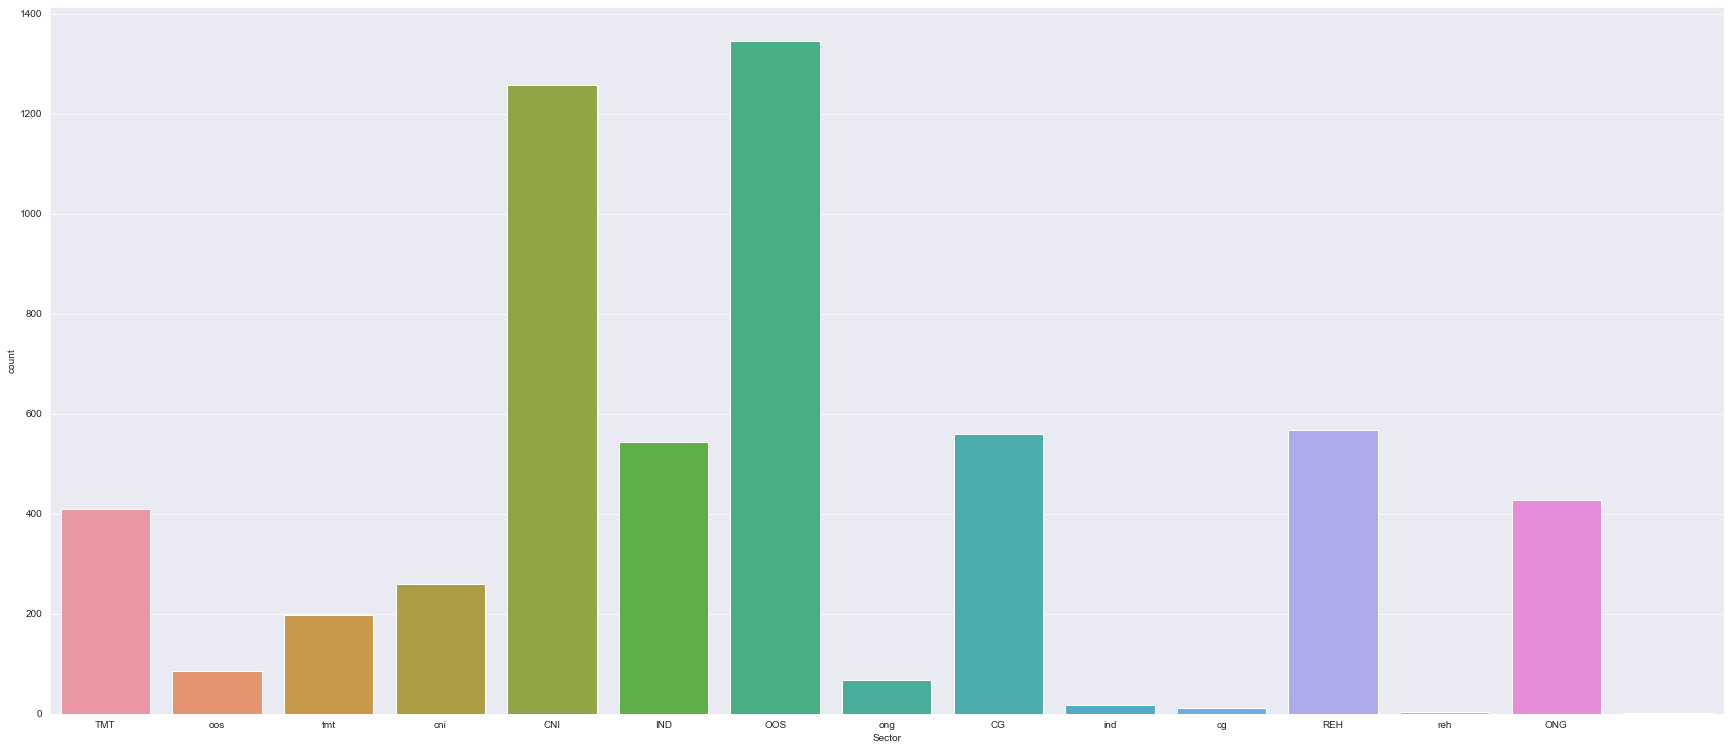

In [193]:
sns.set_style('darkgrid')
plt_dims = (30, 13)
fig, ax = plt.subplots(figsize=plt_dims)

# plot a barplot to see number of companies that belongs to specific sectors
sns.countplot(x="Sector", data=df_valid, ax=ax)
plt.show()

<div class="alert alert-block alert-info">
    <b>Analysis Summary:</b> We see that most of the companies comes from the CNI(Construction And Infrastructure), with TMT(Technology, Media and Telecomm) sector.
</div>

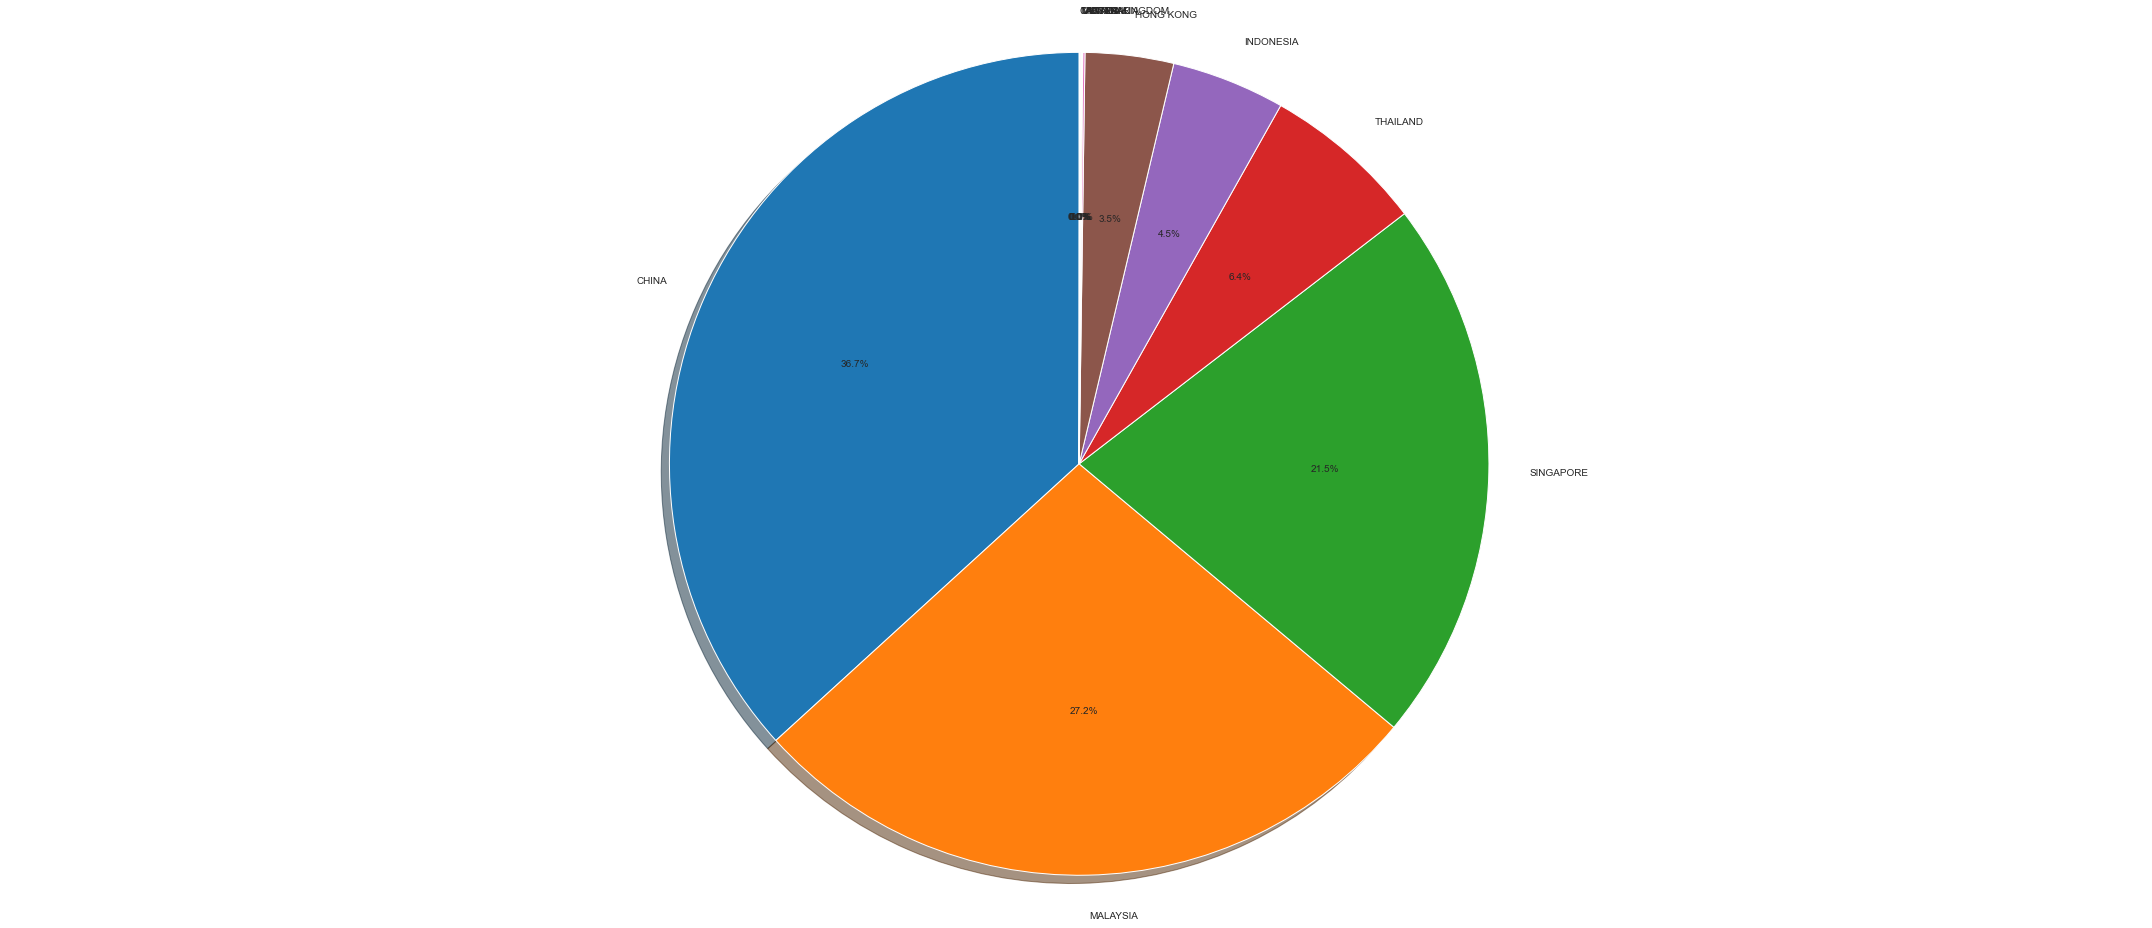

In [194]:
# Pie chart
labels = list(df_valid['Country'].unique())
sizes = list(df_valid['Country'].value_counts())

plt_dims = (30, 13)
fig1, ax1 = plt.subplots(figsize=plt_dims)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
    <b>Analysis Summary:</b> We see that most of the companies are Singapre-Based companies, followed up by Hong Kong, Indonesia and so on.
</div>

### 3.5. See examples of company description

---

We would now like to see some examples of the company descriptions in order to undestand later how to preprocess them later on.

In [195]:
# configurate pandas dataframe to let us see the entire company description IN FULL
pd.set_option('display.max_colwidth', None)

# get the 1st 50 results and observe
df_valid.loc[0:10,'Company Profile Information']

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Yatai's main products cover various cleaning machinery, cleaning agents, cleaning tools, stone maintenance and other cleaning products; cleaning solutions and services include product technical consultation, product customization, employee training, maintenance and so on.\n
1                                                                             

<div class="alert alert-block alert-info">
    <b>Analysis Summary:</b> We do realise that some of the company profile message have some breaks in between like '\n'. Now, we will have to take away all these problems so that it is one string of paragraph with no such annotations in betweeen.
</div>

---
---

# 4.Data Preprocessing

### 4.1. Removing `\n`

---

Now, we will like to standardize all the paragraphs such that the are homogenous, before we tokenize the paragraph.

In [196]:
# get rid of the \n found in the respective descriptions
df_valid = df_valid.replace('\n',' ', regex=True)

# now we validate to see if theye are really gone
df_valid.loc[0:10,'Company Profile Information']

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Yatai's main products cover various cleaning machinery, cleaning agents, cleaning tools, stone maintenance and other cleaning products; cleaning solutions and services include product technical consultation, product customization, employee training, maintenance and so on. 
1                                                                             

### 4.2. Calculating the word length distribution

---

Here, we will be calculating the world length distribution of the collective company description.

In [197]:
# first, add in a new column that tabluates the length of the respecive company description
df_valid["length"] = df_valid["Company Profile Information"].str.len()
df_valid.head()

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information,length
0,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Yatai's main products cover various cleaning machinery, cleaning agents, cleaning tools, stone maintenance and other cleaning products; cleaning solutions and services include product technical consultation, product customization, employee training, maintenance and so on.",273.0
1,EXIS TECH SDN. BHD.,MALAYSIA,oos,others,others,NaN,"In the beginning, it started off by providing technical support for test handlers, then moving into module design and production. Its first, in-house designed, full-fledged handler was introduced in 2008. Since then, the company has designed and produced a wide range of turret and pick-and-place solutions for its customers all over the world.",344.0
3,Aztech Electronics Pte Ltd,SINGAPORE,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Being a turnkey, one-stop integrated solutions provider based in Singapore, Aztech is equipped with state-of-the-art equipment, R&D, design, manufacturing and packaging capabilities to deliver a seamless, unified experience. Each and every time. Always striving towards the edge of technology for more than 34 years, we have been building capabilities to serve clients’ manufacturing needs, including the consumer electronics, telecommunications, healthtech, LED lighting, automotive and technology start-up market segments.",524.0
4,TONGDUN INTERNATIONAL PTE LTD,SINGAPORE,tmt,it_services,it_services,midstream,"Tongdun Technology is a professional third-party intelligent risk management and decision-making service provider headquartered in Hangzhou, Zhejiang. By integrating artificial intelligence into business scenarios, Tongdun Technology offers solutions in intelligent user analysis, intelligent risk management, intelligent antifraud and intelligent operation to clients from various industries including financial industry, internet business, logistics, healthcare, retail, smart cities and government bodies. Over 10,000 corporate clients have chosen Tongdun Technology’s products and services",593.0
5,EMASTIGA ENGRG PTE LTD,SINGAPORE,cni,cni_service providers,cni_service providers,midstream,"For over 30 years, EMASTIGA has been servicing the construction and the oil and gas industries with distinction.We try our hardest to create win-win situations and value-add to our clients with every transaction.",212.0


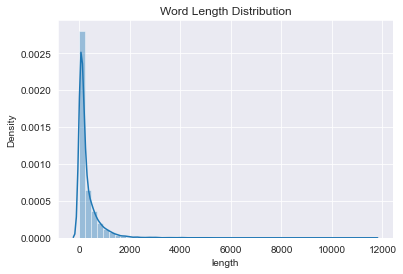

In [198]:
# now plot a distribution plot to see the word length distribution
sns.distplot(df_valid["length"], kde=True)
plt.title('Word Length Distribution')
plt.show()

<div class="alert alert-block alert-info">
    <b>Analysis Summary:</b> We can see that there is a high record of the company description having a total word length of around 200 to 300, while those aboce 800 is very rare.
</div>

### 4.3. Populating Nan cells

---

We will now have to populate Nan cells with space so that we can carry on and process with text tokenization.

In [199]:
# fill na with space instead of others
df_valid.fillna(" " ,inplace=True)

df_valid

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information,length
0,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Yatai's main products cover various cleaning machinery, cleaning agents, cleaning tools, stone maintenance and other cleaning products; cleaning solutions and services include product technical consultation, product customization, employee training, maintenance and so on.",273.0
1,EXIS TECH SDN. BHD.,MALAYSIA,oos,others,others,,"In the beginning, it started off by providing technical support for test handlers, then moving into module design and production. Its first, in-house designed, full-fledged handler was introduced in 2008. Since then, the company has designed and produced a wide range of turret and pick-and-place solutions for its customers all over the world.",344.0
3,Aztech Electronics Pte Ltd,SINGAPORE,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Being a turnkey, one-stop integrated solutions provider based in Singapore, Aztech is equipped with state-of-the-art equipment, R&D, design, manufacturing and packaging capabilities to deliver a seamless, unified experience. Each and every time. Always striving towards the edge of technology for more than 34 years, we have been building capabilities to serve clients’ manufacturing needs, including the consumer electronics, telecommunications, healthtech, LED lighting, automotive and technology start-up market segments.",524.0
4,TONGDUN INTERNATIONAL PTE LTD,SINGAPORE,tmt,it_services,it_services,midstream,"Tongdun Technology is a professional third-party intelligent risk management and decision-making service provider headquartered in Hangzhou, Zhejiang. By integrating artificial intelligence into business scenarios, Tongdun Technology offers solutions in intelligent user analysis, intelligent risk management, intelligent antifraud and intelligent operation to clients from various industries including financial industry, internet business, logistics, healthcare, retail, smart cities and government bodies. Over 10,000 corporate clients have chosen Tongdun Technology’s products and services",593.0
5,EMASTIGA ENGRG PTE LTD,SINGAPORE,cni,cni_service providers,cni_service providers,midstream,"For over 30 years, EMASTIGA has been servicing the construction and the oil and gas industries with distinction.We try our hardest to create win-win situations and value-add to our clients with every transaction.",212.0
...,...,...,...,...,...,...,...,...
6595,BATANGHARI SAWIT SEJAHTERA PT,INDONESIA,CG,agribusiness,palm oil,Across value chain,"Type: Palm Oil Mill Area: Jambi Products: Crude Palm Oil (CPO), Palm Kernel (PK)",80.0
6596,PAN ENERGY PTE. LTD.,SINGAPORE,ONG,ong_traders,bunker trader,Downstream,"PAN ENERGY is an ACRA-registered entity that has been operating for 5 years 7 months in Singapore since its incorporation y in 2015. Officially, PAN ENERGY PTE. LTD. is registered as Exempt Private Limited Company with its address in District 9 (Orchard, Cairnhill, River Valley), primarily operates in the sector of ""SHIPPING LINES (SCHEDULED SERVICES)"", SSIC code - 50021 SHIP BUNKERING",388.0
6597,"TRIM INTERNATIONAL CO.,LTD.",THAILAND,OOS,others,others,,"Established in 2000, TI has grown to become one of Southeast Asia's leaders in leather cut and sewn furniture covers.",118.0
6598,SIAK SIONG CONSTRUCTION SDN BHD,MALAYSIA,REH,commercial,commercial_integrated player,MIDSTREAM,"Siak Siong Group is an established group specialised in construction industry with diversity in engineering industry, real estate development, building materials industry, plantation and Real Estate Investment and Management industry.",234.0


### 4.4. Assigning tags
---
In this section, we will be assigning tags to every row, so that we can make use of the given keywords for bag-of-words (BoW) processing.

In [200]:
# Programmatically assign tags to each definition
sector_keywords = pd.read_excel('./sector_master_definition.xlsx')
df_keywords = sector_keywords[['Sector', 'Subsector', 'Archetype', 'Value Chain', 'Sector Keywords']]

# capitalise all tags
df_keywords['Value Chain'] = df_keywords['Value Chain'].str.upper()
df_keywords.fillna(' ', inplace=True)
df_keywords['Sector Keywords'] = df_keywords['Sector Keywords'].str.upper()
df_keywords['Sector Keywords'].replace(' ', '[]', inplace=True)

# save unique tags, sorted for consistency across runs
sector = np.sort(df_keywords['Sector'].unique())
subsector = np.sort(df_keywords['Subsector'].unique())
archetype = np.sort(df_keywords['Archetype'].unique())
valuechain = np.sort(df_keywords['Value Chain'].unique())

# save counts for use in model
print(len(sector), len(subsector), len(archetype), len(valuechain))
tag_counts = [len(sector), len(subsector), len(archetype), len(valuechain)]

# assign number tag list to each row
taglist = []
for index, row in df_keywords.iterrows():
    temp = []

    temp.append(np.where(sector == row['Sector'])[0][0])
    temp.append(np.where(subsector == row['Subsector'])[0][0])
    temp.append(np.where(archetype == row['Archetype'])[0][0])
    temp.append(np.where(valuechain == row['Value Chain'])[0][0])

    taglist.append(temp)

# assign completed taglist to column in dataframe
df_keywords['list_tag'] = taglist

7 32 92 9


In [201]:
# process data for homogenity
df_valid['Valuechain'] = df_valid['Valuechain'].str.split().str.join(' ')
df_valid['Valuechain'] = df_valid['Valuechain'].str.upper()
df_valid['Sector'] = df_valid['Sector'].str.upper()
df_valid['Valuechain'].replace('', ' ', inplace=True)

# process validation dataset
df_evaluate['Valuechain'] = df_evaluate['Valuechain'].str.split().str.join(' ')
df_evaluate['Valuechain'] = df_evaluate['Valuechain'].str.upper()
df_evaluate['Sector'] = df_evaluate['Sector'].str.upper()
df_evaluate['Valuechain'].replace('', ' ', inplace=True)

taglist_df = []
# process tags for records
for index, row in df_valid.iterrows():
    temp = []

    try: # for error handling
        temp.append(np.where(sector == row['Sector'])[0][0])
        temp.append(np.where(subsector == row['Subsector'])[0][0])
        temp.append(np.where(archetype == row['Archetype'])[0][0])
        temp.append(np.where(valuechain == row['Valuechain'])[0][0])

        taglist_df.append(temp)
    except:
        # drop data if not valid
        print(row, '\n')
        df_valid.drop(index, inplace=True)


df_valid['list_tag'] = taglist_df

df_valid.shape

Company                        TOP FOUNTAIN LIMITED
Country                                   HONG KONG
Sector                                             
Subsector                                          
Archetype                                          
Valuechain                                         
Company Profile Information                        
length                                             
Name: 1557, dtype: object 

Company                                                                                                                        NASA CONCRETE LIMITED PARTNERSHIP
Country                                                                                                                                                 THAILAND
Sector                                                                                                                                                       CNI
Subsector                                                                

(5747, 9)

In [202]:
# combine all keywords from all sectors
keywords_masterlist = []
for index, row in df_keywords.iterrows():
    keywords_masterlist += eval(row['Sector Keywords'])

# remove extraenous keywords, then sort
keywords_masterlist = sorted(list(set(keywords_masterlist)))
print(len(keywords_masterlist))

1481


### 4.6. Text Tokenization, Removing Stop Words, punctuations, numbers, stop words and Lower Case

---

Now we will start to tokenize the word after we have ensure that the text description between the company descriptions are homogenous. In this process, we will also process with stop words, punctuations, numeric figures, lower cap words and lemmatize words all using the spaCy API.

In [203]:
# we will have to ensure all the dtype of the respective columns are in string and not float for spacy to handle properly, so now we will attempt to convert all into strings
columns_to_convert = ['Sector', 'Subsector', 'Archetype', 'Valuechain', 'Company Profile Information']

for i in columns_to_convert:
    df_valid[i] = df_valid[i].astype(str)

Here we will do everything necessary to start up spacy for use in preprocessing the text.

In [204]:
# import required libraries 
from spacy.language import Language
from spacy.tokens import Doc
from spacy.lang.char_classes import ALPHA, ALPHA_LOWER, ALPHA_UPPER, CONCAT_QUOTES, LIST_ELLIPSES, LIST_ICONS
from spacy.util import compile_infix_regex

# initialise nlp engine
nlp = spacy.load("en_core_web_lg")

# declare custom properties
Doc.set_extension('processed', default=True, force=True)

# Modify tokenizer infix patterns
infixes = (
    LIST_ELLIPSES
    + LIST_ICONS
    + [
        r"(?<=[0-9])[+\-\*^](?=[0-9-])",
        r"(?<=[{al}{q}])\.(?=[{au}{q}])".format(
            al=ALPHA_LOWER, au=ALPHA_UPPER, q=CONCAT_QUOTES
        ),
        r"(?<=[{a}]),(?=[{a}])".format(a=ALPHA),
        r"(?<=[{a}0-9])[:<>=/](?=[{a}])".format(a=ALPHA),
    ]
)

infix_re = compile_infix_regex(infixes)
nlp.tokenizer.infix_finditer = infix_re.finditer

# custom retokenizer
@Language.component('custom_retokenizer')
def custom_retoken(doc):
    doc_text = doc.text.upper()
    doc_split = [i.text.upper() for i in doc]
    temp_kw = [i.lstrip().rstrip() for i in keywords_masterlist if len(i.lstrip().rstrip().split(' ')) > 1]
    for token in temp_kw:
        token_length = len(token.split(' '))
        token_split = token.split(' ')
        if token in doc_text and token_split[0] in doc_split:
            merge_pos = doc_split.index(token_split[0])
            with doc.retokenize() as retokenizer:
                try:
                    retokenizer.merge(doc[merge_pos:merge_pos + token_length], attrs={'LEMMA' : token.lower()})
                except:
                    print(merge_pos, merge_pos+token_length)

    return doc

# custom lemmatizer
@Language.component("custom_preprocess")
def custom_preprocess(doc):
    temp = []
    # filter through each token and add to preprocessed text if requirements #
    # met.                                                                   #
    for t in doc:
        if (not t.is_punct and not t.like_num and not t.is_stop and not t.is_digit and not (t.ent_type == 396 or t.ent_type == 397)):
            temp.append(t.lemma_.upper())

    doc._.processed = temp

    return doc

# add custom pipeline components to default pipeline
nlp.add_pipe('custom_retokenizer')
nlp.add_pipe('custom_preprocess', last=True)

<function __main__.custom_preprocess(doc)>

In [205]:
# run the pipeline on data
processed_doc = list(nlp.pipe(df_valid['Company Profile Information']))

3 5
95 97
3 5
4 6


In [206]:
# add lemmatised words to dataframe
df_valid['processed'] = [doc._.processed for doc in processed_doc]

# add tok2vec vectors to dataframe
df_valid['tok2vec_vectors'] = [doc.vector for doc in processed_doc]

df_valid

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information,length,list_tag,processed,tok2vec_vectors
0,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,TMT,consumer electronics,consumer electronics_distributor,DOWNSTREAM,"Yatai's main products cover various cleaning machinery, cleaning agents, cleaning tools, stone maintenance and other cleaning products; cleaning solutions and services include product technical consultation, product customization, employee training, maintenance and so on.",273.0,"[6, 8, 20, 3]","[YATAI, MAIN, PRODUCT, COVER, CLEANING, MACHINERY, CLEAN, AGENT, CLEANING, TOOL, STONE, MAINTENANCE, CLEANING, PRODUCT, CLEAN, SOLUTION, SERVICE, INCLUDE, PRODUCT, TECHNICAL, CONSULTATION, PRODUCT, CUSTOMIZATION, EMPLOYEE, TRAINING, MAINTENANCE]","[-0.15241948, 0.21095975, -0.09275485, -0.16138136, -0.014823567, 0.016085902, 0.040125974, -0.21310952, -0.101847045, 1.8460734, -0.16839285, -0.032950826, 0.046391834, -0.0859097, -0.18023936, -0.103850976, 0.05092627, 1.7097157, -0.29955038, 0.12625581, 0.05597487, 0.18340886, -0.074091464, -0.10954478, 0.1556841, 0.00055564765, -0.022111127, -0.012227118, 0.10703608, -0.10581569, 0.15117547, -0.06474909, 0.019971719, 0.1297714, 0.029767118, -0.09600929, 0.027674533, -0.039159935, 0.07369042, -0.018952284, -0.107794, 0.020556318, -0.018955924, -0.024269558, -0.15962683, 0.10172302, -0.122959435, 0.0028336872, 0.12574223, 0.03392581, 0.18180653, -0.093938075, 0.10900337, 0.20526816, -0.18227188, -0.045929708, 0.048952926, -0.11491352, -0.09131242, 0.023215685, 0.16431615, -0.20052531, -0.08381992, 0.16536383, 0.29203144, -0.009875105, 0.029876715, 0.10816347, -0.088352025, -0.023527617, -0.0607822, 0.03707041, 0.077662155, -0.09140042, 0.10423221, 0.07949765, 0.09907111, -0.076503955, 0.14340451, 0.02529484, 0.03784595, 0.11201159, -0.02841272, -0.18528502, -0.055898603, -0.23285827, -0.06545879, 0.60751045, 0.2978246, 0.17540774, 0.14611827, -0.021849057, -0.02368667, 0.003529672, 0.15434404, -0.15489411, 0.13902028, -0.035454873, -0.103131555, -0.1264077, ...]"
1,EXIS TECH SDN. BHD.,MALAYSIA,OOS,others,others,,"In the beginning, it started off by providing technical support for test handlers, then moving into module design and production. Its first, in-house designed, full-fledged handler was introduced in 2008. Since then, the company has designed and produced a wide range of turret and pick-and-place solutions for its customers all over the world.",344.0,"[4, 24, 64, 0]","[BEGINNING, START, PROVIDE, TECHNICAL, SUPPORT, TEST, HANDLER, MOVE, MODULE, DESIGN, PRODUCTION, IN-HOUSE, DESIGN, FULL-FLEDGED, HANDLER, INTRODUCE, COMPANY, DESIGN, PRODUCE, WIDE, RANGE, TURRET, PICK-AND-PLACE, SOLUTION, CUSTOMER, WORLD]","[0.0088987155, 0.15596527, -0.023968624, -0.10640967, 0.15059486, 0.02441534, 0.026093703, -0.06508855, -0.012574961, 2.0397055, -0.10335777, 0.002561748, 0.08504119, -0.07056205, -0.07496742, -0.1192774, -0.008922326, 1.3509823, -0.19787252, -0.05111099, -0.04453341, 0.0002752299, -0.051922053, -0.0502363, 0.039840918, -0.0068229474, -0.037655905, -0.02523214, 0.013041469, -0.05244003, -0.047023993, -0.06540198, -0.033282306, 0.07595571, 0.061523918, -0.19178237, -0.031845987, 0.0128334155, 0.06641691, -0.058235634, 0.06451262, 0.08523547, -0.033901118, -0.12237582, -0.010076054, 0.06611615, -0.11190192, -0.032429744, 0.03788886, 0.055828843, 0.05113231, -0.017591946, -0.07631377, 0.06766296, -0.06693413, -0.034709837, 0.042020842, -0.08583616, 0.038655847, -0.09566454, 0.020608077, 0.0017409028, -0.01821662, 0.20646286, 0.056404747, -0.036760915, 0.032013588, 0.07247104, 0.035434373, 0.035312675, 0.013011906, 0.05891601, 0.14574729, -0.0036552383, -0.004403966, -0.043586608, 0.11469478, -0.042697042, -0.0009122027, 0.19623666, -0.016732056, 0.08585507, -0.08273145, -0.040164746, 0.02927483, -0.22216496, -0.27731875, 0.17086646, 0.17290665, 0.14956519, -0.04324745, 0.021676507, 0.018096633, 0.049635164, 0.10907049, -0.0795291, 0.038062915, -

### 4.7. Bag of Words / TF-IDF

In [207]:
# do bag of words, normalized
bow_vectors = []
max_count = 1

for index, row in df_valid.iterrows():
    company = row['processed']

    dictionary = dict.fromkeys(keywords_masterlist, 0)
    for word in company:
        if word in keywords_masterlist:
            dictionary[word] += 1
            
    temp_bow_vector = list(dictionary.values())
    if max(temp_bow_vector) > max_count:
        max_count = max(temp_bow_vector)

    # append to dataframe
    bow_vectors.append(temp_bow_vector)

    # print(f'{sum(dictionary.values()):>3}/{len(dictionary.values()):<3} |', dictionary.values())
    
# # normalize all vectors
# for i, vector in enumerate(bow_vectors):
#     bow_vectors[i] = list(np.array(vector) / max_count)
    
df_valid['BoW_vectors'] = bow_vectors

df_valid

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information,length,list_tag,processed,tok2vec_vectors,BoW_vectors
0,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,TMT,consumer electronics,consumer electronics_distributor,DOWNSTREAM,"Yatai's main products cover various cleaning machinery, cleaning agents, cleaning tools, stone maintenance and other cleaning products; cleaning solutions and services include product technical consultation, product customization, employee training, maintenance and so on.",273.0,"[6, 8, 20, 3]","[YATAI, MAIN, PRODUCT, COVER, CLEANING, MACHINERY, CLEAN, AGENT, CLEANING, TOOL, STONE, MAINTENANCE, CLEANING, PRODUCT, CLEAN, SOLUTION, SERVICE, INCLUDE, PRODUCT, TECHNICAL, CONSULTATION, PRODUCT, CUSTOMIZATION, EMPLOYEE, TRAINING, MAINTENANCE]","[-0.15241948, 0.21095975, -0.09275485, -0.16138136, -0.014823567, 0.016085902, 0.040125974, -0.21310952, -0.101847045, 1.8460734, -0.16839285, -0.032950826, 0.046391834, -0.0859097, -0.18023936, -0.103850976, 0.05092627, 1.7097157, -0.29955038, 0.12625581, 0.05597487, 0.18340886, -0.074091464, -0.10954478, 0.1556841, 0.00055564765, -0.022111127, -0.012227118, 0.10703608, -0.10581569, 0.15117547, -0.06474909, 0.019971719, 0.1297714, 0.029767118, -0.09600929, 0.027674533, -0.039159935, 0.07369042, -0.018952284, -0.107794, 0.020556318, -0.018955924, -0.024269558, -0.15962683, 0.10172302, -0.122959435, 0.0028336872, 0.12574223, 0.03392581, 0.18180653, -0.093938075, 0.10900337, 0.20526816, -0.18227188, -0.045929708, 0.048952926, -0.11491352, -0.09131242, 0.023215685, 0.16431615, -0.20052531, -0.08381992, 0.16536383, 0.29203144, -0.009875105, 0.029876715, 0.10816347, -0.088352025, -0.023527617, -0.0607822, 0.03707041, 0.077662155, -0.09140042, 0.10423221, 0.07949765, 0.09907111, -0.076503955, 0.14340451, 0.02529484, 0.03784595, 0.11201159, -0.02841272, -0.18528502, -0.055898603, -0.23285827, -0.06545879, 0.60751045, 0.2978246, 0.17540774, 0.14611827, -0.021849057, -0.02368667, 0.003529672, 0.15434404, -0.15489411, 0.13902028, -0.035454873, -0.103131555, -0.1264077, ...]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
1,EXIS TECH SDN. BHD.,MALAYSIA,OOS,others,others,,"In the beginning, it started off by providing technical support for test handlers, then moving into module design and production. Its first, in-house designed, full-fledged handler was introduced in 2008. Since then, the company has designed and produced a wide range of turret and pick-and-place solutions for its customers all over the world.",344.0,"[4, 24, 64, 0]","[BEGINNING, START, PROVIDE, TECHNICAL, SUPPORT, TEST, HANDLER, MOVE, MODULE, DESIGN, PRODUCTION, IN-HOUSE, DESIGN, FULL-FLEDGED, HANDLER, INTRODUCE, COMPANY, DESIGN, PRODUCE, WIDE, RANGE, TURRET, PICK-AND-PLACE, SOLUTION, CUSTOMER, WORLD]","[0.0088987155, 0.15596527, -0.023968624, -0.10640967, 0.15059486, 0.02441534, 0.026093703, -0.06508855, -0.012574961, 2.0397055, -0.10335777, 0.002561748, 0.08504119, -0.07056205, -0.07496742, -0.1192774, -0.008922326, 1.3509823, -0.19787252, -0.05111099, -0.04453341, 0.0002752299, -0.051922053, -0.0502363, 0.039840918, -0.0068229474, -0.037655905, -0.02523214, 0.013041469, -0.05244003, -0.047023993, -0.06540198, -0.033282306, 0.07595571, 0.061523918, -0.19178237, -0.031845987, 0.0128334155, 0.06641691, -0.058235634, 0.06451262, 0.08523547, -0.033901118, -0.12237582, -0.010076054, 0.06611615, -0.11190192, -0.032429744, 0.03788886, 0.055828843, 0.05113231, -0.017591946, -0.07631377, 0.06766296, -0.06693413, -0.034709837, 0.042020842, -0.08583616, 0.038655847, -0.09566454, 0.020608077, 0.0017409028, -0.01821662, 0.20646286, 0.056404747, -0.036760915, 0.032013588, 0.07247104, 0.035434373, 0.035312675, 0.013011906, 0.05891601, 0.145

In [33]:
# clean up BoW data 
temp = 0
for index, row in df_valid.iterrows():
    if sum(row['BoW_vectors']) <= 0:
        df_valid.drop(index, inplace=True)

df_valid.shape

(4815, 12)

In [215]:
# import validation dataset
df_evaluate = pd.read_excel('./val_dataset.xlsx')
df_evaluate.replace('NAN', np.NaN, inplace=True)

# drop unnecessary columns
df_evaluate.drop(rows_to_drop, axis=1, inplace=True)

# replace newline characters in validation data
df_evaluate = df_evaluate = df_evaluate.replace('\n', ' ', regex=True)

# fill in NAN values in validation data
df_evaluate.fillna(' ', inplace=True)

# change dtype of validation data columns
for i in columns_to_convert:
    df_valid[i] = df_valid[i].astype(str)

# add tags to validation data
taglist_df = []
# process tags for records
for index, row in df_evaluate.iterrows():
    temp = []

    try: # for error handling
        temp.append(np.where(sector == row['Sector'])[0][0])
        temp.append(np.where(subsector == row['Subsector'])[0][0])
        temp.append(np.where(archetype == row['Archetype'])[0][0])
        temp.append(np.where(valuechain == row['Valuechain'])[0][0])

        taglist_df.append(temp)
    except Exception as e:
        # drop data if not valid
        print(row.name, e, '\n')
        df_evaluate.drop(index, inplace=True)

df_evaluate['list_tag'] = taglist_df

# run spacy on validation data
evaluate_doc = list(nlp.pipe(df_evaluate['Company Profile Information']))

# add spacy processed words and vectors to validation dataframe
df_evaluate['processed'] = [doc._.processed for doc in evaluate_doc]
df_evaluate['tok2vec_vectors'] = [doc.vector for doc in evaluate_doc]

# do bag of words for validation data
bow_vectors = []

for index, row in df_evaluate.iterrows():
    company = row['processed']

    dictionary = dict.fromkeys(keywords_masterlist, 0)
    for word in company:
        if word in keywords_masterlist:
            dictionary[word] += 1
            
    temp_bow_vector = list(dictionary.values())
    if max(temp_bow_vector) > max_count:
        max_count = max(temp_bow_vector)

    # append to dataframe
    bow_vectors.append(temp_bow_vector)
    
df_evaluate['BoW_vectors'] = bow_vectors

df_evaluate.head(3)

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information,list_tag,processed,tok2vec_vectors,BoW_vectors
0,"BANGKOK ROLLER CO., LTD.",THAILAND,OOS,others,others,,"Bangkok Roller Co., Ltd. is the leading manufacturer and supplier of supplier rolls in Thailand. For over 20 years, we have been trusted by local and overseas customer. Our Rubber roll products have been major role in many manufacturing industries such as paper, steel sheets, textiles, plastic, films, printing, packaging product, and many more. Furthermore, our reputable rubber roll products have been parted in reducing the import of high priced rubber rolls from overseas.","[4, 24, 64, 0]","[BANGKOK, ROLLER, CO., LTD., LEAD, MANUFACTURER, SUPPLIER, SUPPLIER, ROLL, THAILAND, YEAR, TRUST, LOCAL, OVERSEAS, CUSTOMER, RUBBER, ROLL, PRODUCT, MAJOR, ROLE, MANUFACTURING, INDUSTRY, PAPER, STEEL SHEET, TEXTILE, PLASTIC, FILM, PRINTING, PACKAGING, PRODUCT, FURTHERMORE, REPUTABLE, RUBBER, ROLL, PRODUCT, PART, REDUCE, IMPORT, HIGH, PRICE, RUBBER, ROLL, OVERSEAS]","[-0.057685155, 0.2115785, -0.03147221, -0.17814417, 0.17538649, 0.033983827, -0.027668668, -0.123965755, -0.13181639, 1.8551306, -0.15736748, 0.029855158, 0.11265339, -0.12504563, -0.07674297, -0.09440538, 0.06139562, 1.363419, -0.15326539, 0.1340252, -0.0548392, 0.0738244, -0.061550513, 0.0480595, -0.012247533, 0.013309164, -0.10519558, -0.039817132, 0.014221066, -0.06978026, 0.10308826, 0.06357016, -0.10603121, 0.08457979, 0.109081924, -0.05192251, 0.017023744, -0.012120642, 0.08584156, -0.034634266, 0.034561504, 0.06996525, 0.050695244, -0.1330373, -0.08694513, 0.021933405, -0.098533764, -0.074474804, 0.12024665, -0.0032658437, 0.07436689, -0.02922597, -0.031138541, -0.022591816, -0.018413717, -0.050598897, 0.03546367, -0.12065057, 0.01569407, -0.10735568, 0.010489935, -0.15073073, -0.023945471, 0.18958172, 0.082140855, -0.036684696, 0.06182886, 0.1380921, -0.01568787, 0.07268921, -0.023091733, 0.06991887, 0.07371062, 0.041415166, 0.09193657, 0.07495456, 0.07190542, 0.017786883, 0.07984453, 0.10675104, 0.042225588, 0.10768829, -0.11892822, -0.088016905, -0.030261122, -0.3123877, -0.053889986, 0.39034998, 0.19110213, 0.11286529, 0.011368535, -0.048200734, -0.017039156, 0.048219636, 0.12122308, -0.06950426, 0.0780463, -0.07006476, -0.12418257, -0.038933977, ...]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
1,MJETS LIMITED,THAILAND,OOS,others,others,,"MJets currently operates the first and only FBO & Private Jet Terminal in Thailand offering 7 distinct business lines. These include: aircraft charter, aircraft management, consultancy, maintenance & AOG services, air ambulance, ground handling services and FBO facilities with VIP lounge. The highest of safety standards, world-class service and a personal touch are the things about us that have allowed MJets to continue to lead private aviation in Thailand and South-East Asia.","[4, 24, 64, 0]","[MJET, CURRENTLY, OPERATE, FBO, PRIVATE, JET, TERMINAL, THAILAND, OFFER, DISTINCT, BUSINESS, LINE, INCLUDE, AIRCRAFT, CHARTER, AIRCRAFT, MANAGEMENT, CONSULTANCY, MAINTENANCE, AOG, SERVICE, AIR, AMBULANCE, GROUND, HANDLING, SERVICE, FBO, FACILITY, VIP, LOUNGE, HIGH, SAFETY, STANDARD, WORLD-CLASS, SERVICE, PERSONAL, TOUCH, THING, ALLOW, MJETS, CONTINUE, LEAD, PRIVATE, AVIATION, THAILAND, SOUTH-EAST, ASIA]","[0.0809934, 0.14199032, 0.028656067, -0.08420108, 0.20223913, -0.027773317, 0.032055527, -0.07215808, -0.0042647133, 1.8860918, -0.19495092, -0.075085916, 0.06470871, 0.018912286, -0.11437266, -0.08431523, -0.09094049, 1.2504501, -0.16896108, -0.012921025, -0.027268585, 0.087456286, -0.102900065, -0.116656445, 0.09514114, 0.023276709, -0.06993913, -0.015264425, 0.09763413, 0.014724674, 0.05217219

# 5.Models
---
Here we will train the model that will help categorize each company.

### 5.1. Training Models

In [208]:
import tensorflow.keras as Keras

print('--- Version Checking ---')
print("Keras:", Keras.__version__)

--- Version Checking ---
Keras: 2.5.0


In [231]:
X_train = [np.array(list(df_valid['BoW_vectors'])), np.array(list(df_valid['tok2vec_vectors']))]
y_train = np.array(list(df_valid['list_tag']))

X_test = [np.array(list(df_evaluate['BoW_vectors'])), np.array(list(df_evaluate['tok2vec_vectors']))]
y_test = np.array(list(df_evaluate['list_tag']))

In [210]:
# create multi-output model
from tensorflow.keras.layers import Dense, Input, Dropout, Concatenate
from tensorflow.keras import Model

# function to build model branches
def multi_branch(x, name, input_dim, output_dim, dropout_rate):
    x = Dense(input_dim // 2, activation='selu')(x)
    x = Dropout(dropout_rate)(x)

    if name == 'sector' or name == 'subsector' or name == 'archetype':
        x = Dense(input_dim // 3, activation='selu')(x)
        x = Dropout(dropout_rate)(x)

    x = Dense(input_dim // 4, activation='tanh')(x)
    x = Dropout(dropout_rate)(x)

    if name == 'sector' or name == 'subsector' or name == 'archetype':
        x = Dense(input_dim // 4, activation='tanh')(x)
        x = Dropout(dropout_rate)(x)
    
    x = Dense(input_dim // 8, activation='swish')(x)

    # output
    output = Dense(output_dim, name=name, activation='softmax')(x)

    return output

def create_multilabel(labels, labels_output_dim, bow_dim, t2v_dim, dropout_rate=0.3):
    # check labels
    assert len(labels) == len(labels_output_dim)

    input_layer_1 = Input(bow_dim)
    input_layer_2 = Input(t2v_dim)

    # group 1 dense layers
    group_1 = Dense(int(bow_dim), activation='tanh')(input_layer_1)
    group_1 = Dense(bow_dim // 1.5, activation='tanh')(group_1)

    # group 2 dense layers
    group_2 = Dense(t2v_dim, activation='tanh')(input_layer_2)
    group_2 = Dense(t2v_dim // 1.5, activation='tanh')(group_2)

    # concatenate layers
    merge_layer = Concatenate()([group_1, group_2])
    merge_layer = Dense((bow_dim // 1.5) + (t2v_dim // 1.5), activation='swish')(merge_layer)
    merge_layer = Dropout(dropout_rate)(merge_layer)
    merge_layer = Dense((bow_dim // 2) + (t2v_dim // 1.5), activation='swish')(merge_layer)
    merge_layer = Dropout(dropout_rate)(merge_layer)

    # multilabel branches
    branches = []
    for i in range(len(labels)):
        branches.append(multi_branch(merge_layer, labels[i], bow_dim, labels_output_dim[i], dropout_rate))

    # put model together
    model = Model(inputs=[input_layer_1, input_layer_2], outputs=branches, name='company_classification_model')

    return model

# one hot 
def one_hot(arr, n_cat):
    output = []
    for n in arr:
        result = np.zeros(n_cat)
        result[n] = 1

        output.append(result)

    return np.array(output, dtype=int)

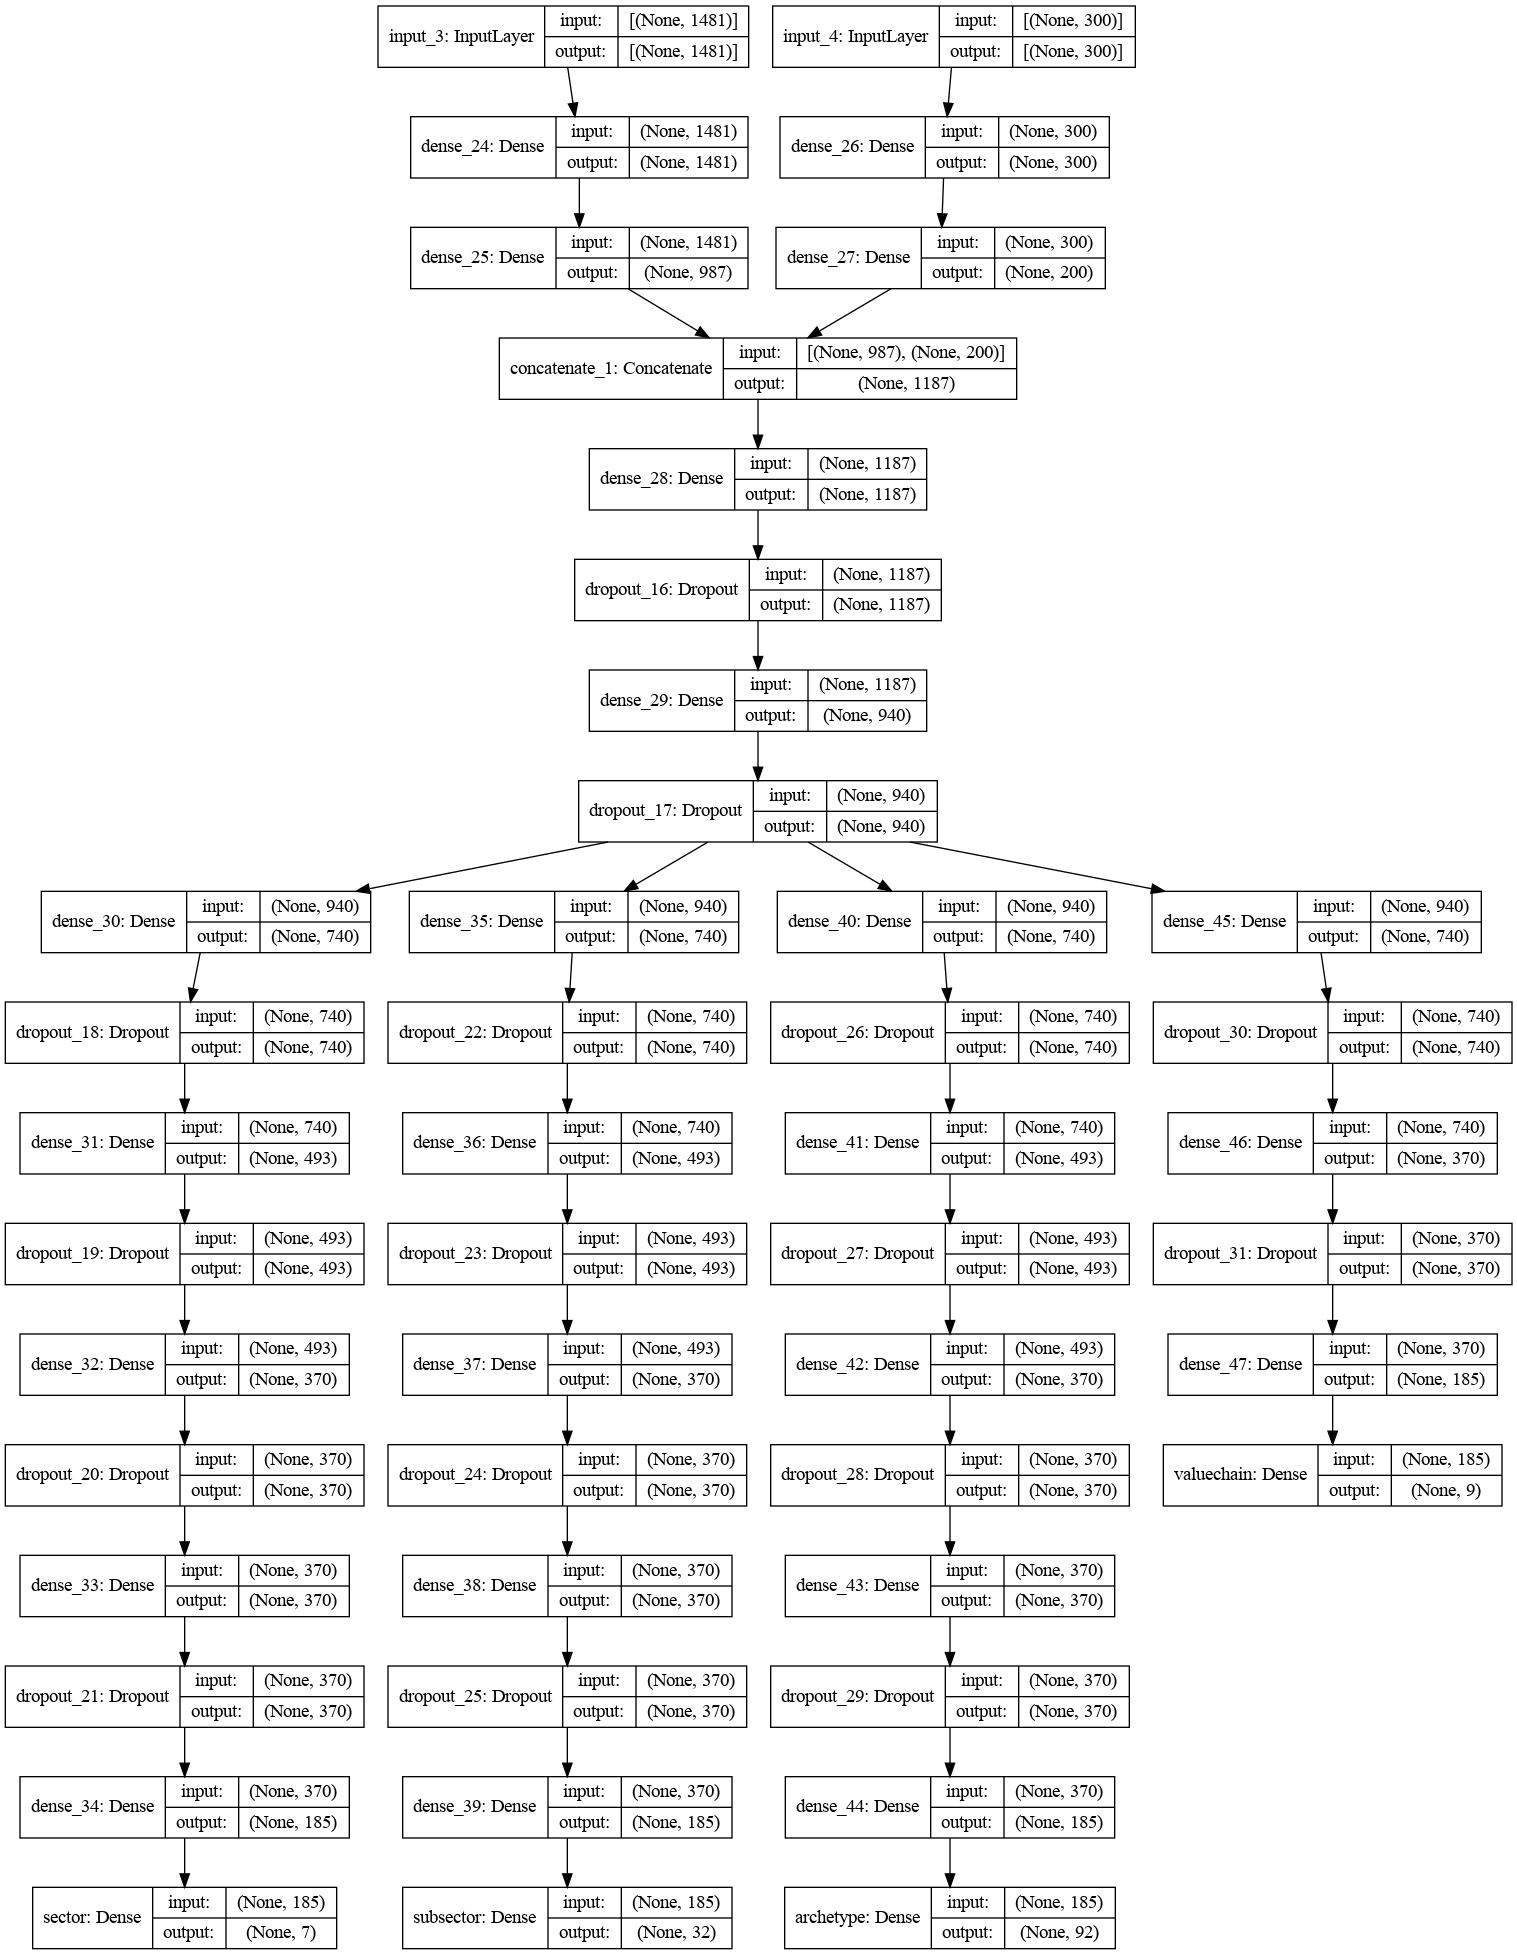

In [211]:
label_names = ['sector', 'subsector', 'archetype', 'valuechain']

model = create_multilabel(label_names, tag_counts, len(keywords_masterlist), 300)

tf.keras.utils.plot_model(model, show_shapes=True)

In [236]:
# preprocess labels before training
y_train_multi = {label_names[i] : one_hot(y_train[:, i], tag_counts[i]) for i in range(4)}
y_test_multi = {label_names[i] : one_hot(y_test[:, i], tag_counts[i]) for i in range(4)}

losses = {i : 'categorical_crossentropy' for i in label_names}

In [213]:
# import metrics
from tensorflow.keras.metrics import Precision, Recall, AUC
from tensorflow.keras.optimizers import SGD

model.compile(optimizer=SGD(nesterov=True), loss=losses, metrics=['accuracy', Precision(), Recall(), AUC(name='auc_precision_recall', num_thresholds=10000)])
history = model.fit(X_train, y_train_multi, epochs=50, batch_size=20)

Epoch 1/50
288/288 [==============================] - 6s 13ms/step - loss: 9.9783 - sector_loss: 1.7450 - subsector_loss: 2.8833 - archetype_loss: 3.7016 - valuechain_loss: 1.6484 - sector_accuracy: 0.3388 - sector_precision_1: 0.8175 - sector_recall_1: 0.0374 - sector_auc_precision_recall: 0.6991 - subsector_accuracy: 0.2586 - subsector_precision_1: 0.8065 - subsector_recall_1: 0.0044 - subsector_auc_precision_recall: 0.7775 - archetype_accuracy: 0.2380 - archetype_precision_1: 0.4500 - archetype_recall_1: 0.0016 - archetype_auc_precision_recall: 0.7879 - valuechain_accuracy: 0.3602 - valuechain_precision_1: 0.7879 - valuechain_recall_1: 0.0226 - valuechain_auc_precision_recall: 0.8166
Epoch 2/50
288/288 [==============================] - 4s 13ms/step - loss: 8.3371 - sector_loss: 1.3457 - subsector_loss: 2.3916 - archetype_loss: 3.1771 - valuechain_loss: 1.4228 - sector_accuracy: 0.5105 - sector_precision_1: 0.8010 - sector_recall_1: 0.2521 - sector_auc_precision_recall: 0.8515 - sub

### 5.2 Evaluating Models

In [229]:
# custom metric analysis
y_test_multi = [one_hot(np.array(list(df_evaluate['list_tag']))[:, i], tag_counts[i]) for i in range(4)]

# obtain predictions
y_pred = model.predict(X_test)

# process predictions

[array([[1.0717267e-03, 2.1912728e-02, 9.1757947e-01, ..., 5.7312399e-02,
         5.8575196e-08, 3.3746008e-05],
        [1.5259347e-03, 3.1015892e-02, 9.9818222e-02, ..., 6.0995519e-01,
         2.3800524e-01, 1.0724718e-02],
        [7.4063661e-05, 1.7395112e-04, 1.4370607e-07, ..., 1.5697477e-02,
         9.8405170e-01, 4.7442930e-07],
        ...,
        [4.3494994e-05, 6.9154747e-02, 1.1015977e-06, ..., 7.8764521e-02,
         8.5196930e-01, 6.9249509e-06],
        [9.8045692e-02, 1.3923008e-02, 4.7608278e-06, ..., 7.1401227e-01,
         1.7162398e-01, 7.8376691e-04],
        [1.5457672e-04, 9.1161841e-01, 7.8112246e-03, ..., 6.8855368e-02,
         7.4462197e-03, 2.4490510e-03]], dtype=float32),
 array([[5.6189838e-05, 5.2225805e-05, 2.8175911e-05, ..., 2.0793515e-05,
         3.3612275e-07, 2.0803493e-03],
        [1.3592764e-04, 2.7401545e-04, 1.1651877e-02, ..., 2.0852406e-06,
         2.6452043e-03, 8.8780747e-05],
        [6.3249601e-05, 6.6883326e-06, 3.9134531e-07, ...,

In [237]:
metrics = model.evaluate(X_test, y_test_multi, verbose=0)[1:]

print(f'Label\t\tLoss\tAccuracy\tPrecision\tRecall\tPR AUC\tF1 Score')
for i, label in enumerate(label_names):
    print(f'{label:<16}{metrics[i]:<8.3f}{metrics[i+4]:<8.3%}\t{metrics[i+8]:<9.3f}\t{metrics[i+12]:<6.3f}\t{metrics[i+16]:<6.3f}\t{(metrics[i+8] * metrics[i+12]) / (metrics[i+8] + metrics[i+12]):<8.3f}')

Label		Loss	Accuracy	Precision	Recall	PR AUC	F1 Score
sector          0.964   72.214% 	0.590    	0.467 	0.610 	0.261   
subsector       1.555   74.924% 	0.662    	0.580 	0.653 	0.309   
archetype       2.196   70.214% 	0.542    	0.381 	0.550 	0.224   
valuechain      1.200   94.335% 	0.961    	0.960 	0.928 	0.480   


In [238]:
unique, counts = np.unique(y_test[:, 1], return_counts=True)
sum_counts = sum(counts)

print(f'Label\t\t\tCount\tPercent')
for i, label in enumerate(unique):
    print(f'{subsector[label]:<24}{counts[i]:>5}\t{counts[i] / sum_counts:>7.2%}')

Label			Count	Percent
agribusiness                9	  0.64%
animal protein             19	  1.36%
auto & mec                107	  7.64%
building_material          92	  6.57%
buildings & industrial     45	  3.21%
cni_equipment suppliers     3	  0.21%
cni_service providers      35	  2.50%
commercial                 21	  1.50%
consumer electronics       78	  5.57%
digital_business            9	  0.64%
diversified                23	  1.64%
fmcg                       38	  2.71%
hotels and accommodation   18	  1.29%
industrial                  9	  0.64%
infrastructure             13	  0.93%
ioc/noc                     7	  0.50%
it_services                31	  2.21%
media                      30	  2.14%
metals and mining          70	  5.00%
mixed                      36	  2.57%
o&g                        41	  2.93%
o&g_service providers/contractors   36	  2.57%
ong_traders                14	  1.00%
others                    200	 14.29%
petrochemical             102	  7.29%
residential        

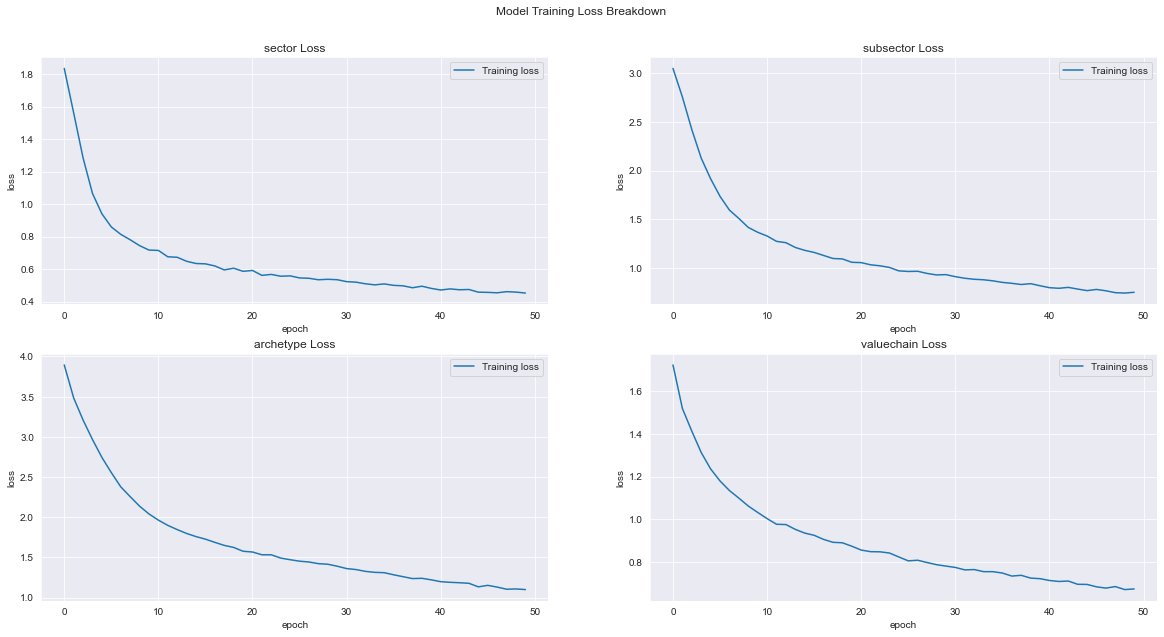

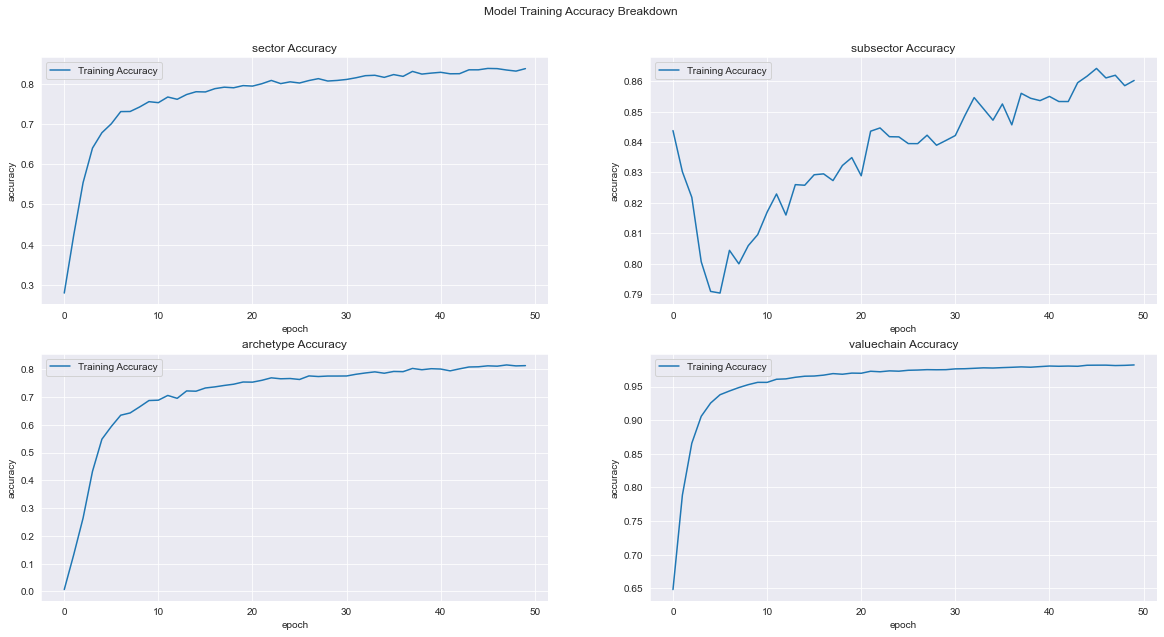

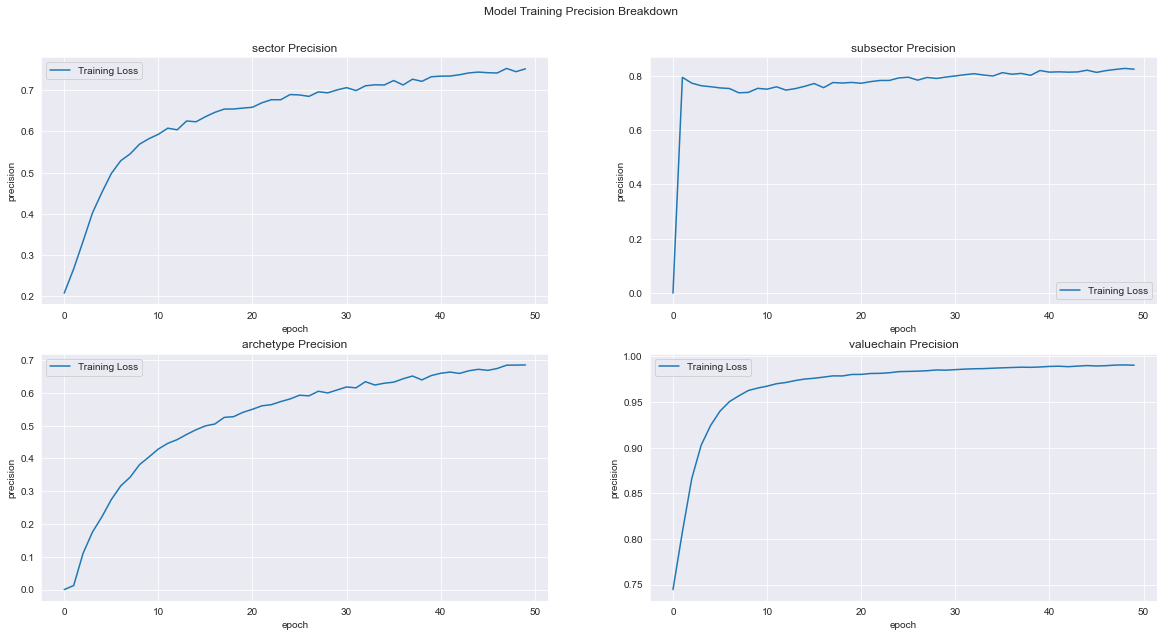

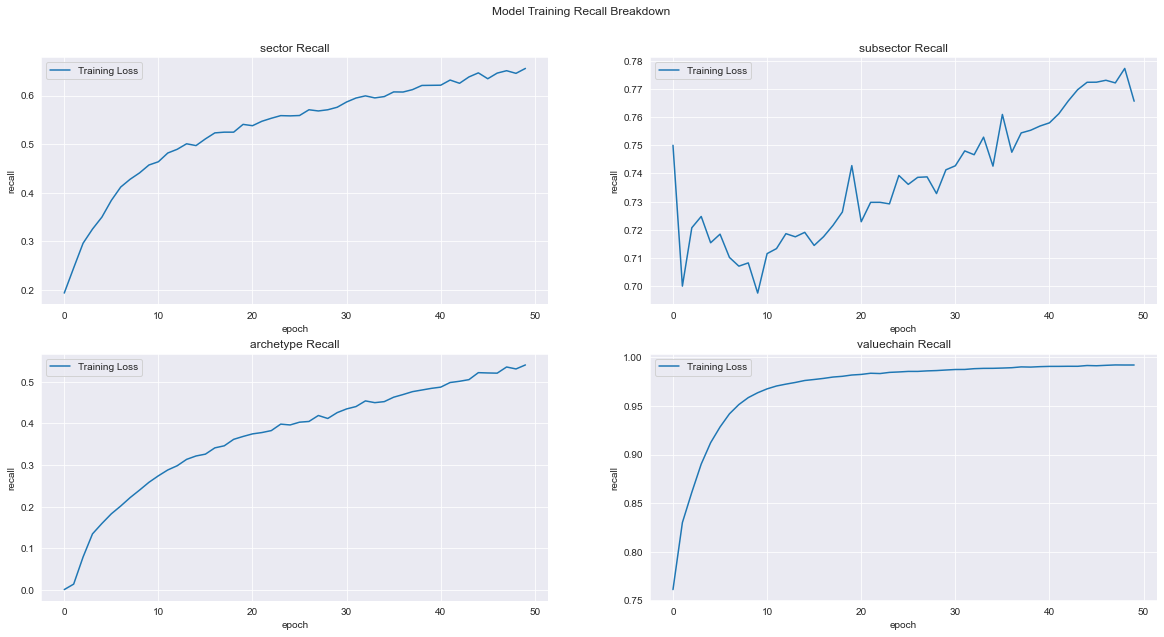

In [143]:
# plot metric graphs for all labels
metric_names = model.metrics_names

fig = plt.figure(1, figsize=(20,10))
plt.suptitle('Model Training Loss Breakdown', y=0.95)

for i, name in enumerate(label_names):
    plt.subplot(2, 2, i+1)
    plt.plot(history.history[metric_names[i+1]])
    plt.title(f'{name} Loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['Training loss'])

fig = plt.figure(2, figsize=(20,10))
plt.suptitle('Model Training Accuracy Breakdown', y=0.95)

for i, name in enumerate(label_names):
    plt.subplot(2, 2, i+1)
    plt.plot(history.history[metric_names[i+5]])
    plt.title(f'{name} Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Training Accuracy'])

fig = plt.figure(3, figsize=(20,10))
plt.suptitle('Model Training Precision Breakdown', y=0.95)

for i, name in enumerate(label_names):
    plt.subplot(2, 2, i+1)
    plt.plot(history.history[metric_names[i+9]])
    plt.title(f'{name} Precision')
    plt.ylabel('precision')
    plt.xlabel('epoch')
    plt.legend(['Training Loss'])

fig = plt.figure(4, figsize=(20,10))
plt.suptitle('Model Training Recall Breakdown', y=0.95)

for i, name in enumerate(label_names):
    plt.subplot(2, 2, i+1)
    plt.plot(history.history[metric_names[i+13]])
    plt.title(f'{name} Recall')
    plt.ylabel('recall')
    plt.xlabel('epoch')
    plt.legend(['Training Loss'])

plt.show()

In [ ]:
results = model.predict(X_test)

predicted_label = []
for label in results:
    predicted_label.append(np.argmax(label, axis = 1))
predicted_label = np.array(predicted_label)

for i in range(predicted_label.shape[1]):
    print(f'Expected: {y_test[i]} | got {predicted_label[:,i]}')

### 5.3. Saving Models

In [ ]:
# save models to file
model.save('./multilabel_model')

In [ ]:
!zip -r multilabel_model.zip ./multilabel_model

---
---
---

# 6.References


## Linking GitHub Private Repo with Google Colab
---
1. [How to clone private Github repo from Google Colab using SSH](https://medium.com/@purba0101/how-to-clone-private-github-repo-in-google-colab-using-ssh-77384cfef18f)
2. [Adding a new SSH key to your GitHub account](https://docs.github.com/en/github/authenticating-to-github/adding-a-new-ssh-key-to-your-github-account)


## How to classify text with NLTK
---
1. [Learning to Classify Text](https://www.nltk.org/book/ch06.html)


## Other references
---
1. [Print very long string completely in pandas dataframe](https://stackoverflow.com/questions/29902714/print-very-long-string-completely-in-pandas-dataframe)
2. [Removing newlines from messy strings in pandas dataframe cells?
](https://stackoverflow.com/questions/44227748/removing-newlines-from-messy-strings-in-pandas-dataframe-cells)
3. [Tokenizing using Pandas and spaCy](https://stackoverflow.com/questions/46981137/tokenizing-using-pandas-and-spacy)
4. [Intro to NLP with spaCy](https://nicschrading.com/project/Intro-to-NLP-with-spaCy/)
5. [A short introduction to NLP in Python with spaCy](https://towardsdatascience.com/a-short-introduction-to-nlp-in-python-with-spacy-d0aa819af3ad)
6. [Punctuation, stopwords and lemmatization with spacy](https://stackoverflow.com/questions/57747613/punctuation-stopwords-and-lemmatization-with-spacy)

